In [1]:
from itertools import permutations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Introduction to non-personalized recommendations

One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.

The DataFrame user_ratings_df, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.

In [2]:
user_ratings_df = pd.read_csv('user_ratings.csv')
user_ratings_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [3]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

movie_popularity

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: count, Length: 9719, dtype: int64

In [4]:
# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object', name='title')


In [5]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


Combining popularity and reviews

In the past two exercises, you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their weaknesses.

Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

In this exercise, you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.

In [6]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Chasing Amy (1997)', 'Mystic River (2003)',
       'Grand Budapest Hotel, The (2014)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Training Day (2001)', 'Bad Boys (1995)',
       'Splash (1984)', 'Mulholland Drive (2001)',
       'The Devil's Advocate (1997)'],
      dtype='object', name='title', length=437)


In [7]:
# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  user_ratings_df[user_ratings_df["title"].isin(popular_movies)]
popular_movies_rankings


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
79246,603,1997,4.0,953925513,"Exorcist, The (1973)",Horror|Mystery
79247,606,1997,3.0,1178911117,"Exorcist, The (1973)",Horror|Mystery
79248,607,1997,5.0,963079420,"Exorcist, The (1973)",Horror|Mystery
79249,608,1997,4.5,1117502891,"Exorcist, The (1973)",Horror|Mystery


In [8]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


In [9]:
# Example of how to use permutations

# Sample list of elements
elements = ['A', 'B', 'C']

# Generate permutations of two elements
perms = list(permutations(elements, 2))

perms


[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]

Finding all pairs of movies
In this exercise, you will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

The user_ratings_df has been loaded once again containing users, and the movies they have seen.

You will need to first create a function that finds all possible pairs of items in a list it is applied to. For ease of use, you will output the values of this as a DataFrame. Since you only want to find movies that have been seen by the same person and not all possible permutations, you will group by user_id when applying the function.

In [10]:
user_ratings_df.groupby('userId')['title'].apply(list) # just to check how apply works, displaying all titles for each user

userId
1      [Toy Story (1995), Grumpier Old Men (1995), He...
2      [Tommy Boy (1995), Gladiator (2000), Shawshank...
3      [Schindler's List (1993), Highlander (1986), C...
4      [Seven (a.k.a. Se7en) (1995), Ed Wood (1994), ...
5      [Toy Story (1995), Usual Suspects, The (1995),...
                             ...                        
606    [Toy Story (1995), Seven (a.k.a. Se7en) (1995)...
607    [Toy Story (1995), Braveheart (1995), Star War...
608    [Toy Story (1995), Grumpier Old Men (1995), Se...
609    [Toy Story (1995), Braveheart (1995), Dumb & D...
610    [Toy Story (1995), Heat (1995), Seven (a.k.a. ...
Name: title, Length: 610, dtype: object

In [11]:
user_2 = user_ratings_df.groupby('userId')['title'].apply(list).loc[2]
user_2

['Tommy Boy (1995)',
 'Gladiator (2000)',
 'Shawshank Redemption, The (1994)',
 'Good Will Hunting (1997)',
 'Kill Bill: Vol. 1 (2003)',
 'Collateral (2004)',
 'Talladega Nights: The Ballad of Ricky Bobby (2006)',
 'Departed, The (2006)',
 'Dark Knight, The (2008)',
 'Step Brothers (2008)',
 'Inglourious Basterds (2009)',
 'Zombieland (2009)',
 'Shutter Island (2010)',
 'Exit Through the Gift Shop (2010)',
 'Inception (2010)',
 'Town, The (2010)',
 'Inside Job (2010)',
 'Louis C.K.: Hilarious (2010)',
 'Warrior (2011)',
 'Dark Knight Rises, The (2012)',
 'Girl with the Dragon Tattoo, The (2011)',
 'Django Unchained (2012)',
 'Wolf of Wall Street, The (2013)',
 'Interstellar (2014)',
 'Whiplash (2014)',
 'The Drop (2014)',
 'Ex Machina (2015)',
 'Mad Max: Fury Road (2015)',
 'The Jinx: The Life and Deaths of Robert Durst (2015)']

In [12]:
len(user_2), len(list(permutations(user_2, 2))) # 29! / (29-2)! = 812 permutations without repetitions

(29, 812)

In [13]:
# Group by userId and calculate permutations of titles for each user
user_permutations = user_ratings_df.groupby('userId')['title'].apply(lambda x: list(permutations(x.values, 2)))

pd.DataFrame(user_permutations.loc[2]) # creating dataframe afterwards

,0,1
0,Tommy Boy (1995),Gladiator (2000)
1,Tommy Boy (1995),"Shawshank Redemption, The (1994)"
2,Tommy Boy (1995),Good Will Hunting (1997)
3,Tommy Boy (1995),Kill Bill: Vol. 1 (2003)
4,Tommy Boy (1995),Collateral (2004)
...,...,...
807,The Jinx: The Life and Deaths of Robert Durst ...,Interstellar (2014)
808,The Jinx: The Life and Deaths of Robert Durst ...,Whiplash (2014)
809,The Jinx: The Life and Deaths of Robert Durst ...,The Drop (2014)
810,The Jinx: The Life and Deaths of Robert Durst ...,Ex Machina (2015)


In [14]:
# Display number of permutations for each user
for user_id, perms in user_permutations.items():
    print(f"User {user_id, len(perms)}:")
    if user_id > 10:
        break

User (1, 53592):
User (2, 812):
User (3, 1482):
User (4, 46440):
User (5, 1892):
User (6, 98282):
User (7, 22952):
User (8, 2162):
User (9, 2070):
User (10, 19460):
User (11, 4032):


In [15]:
# Group by userId and calculate permutations of titles for each user (creating DataFrame directly)
user_permutations = user_ratings_df.groupby('userId')['title'].apply(lambda x: pd.DataFrame(list(permutations(x.values, 2))))

user_permutations.loc[2]

,0,1
0,Tommy Boy (1995),Gladiator (2000)
1,Tommy Boy (1995),"Shawshank Redemption, The (1994)"
2,Tommy Boy (1995),Good Will Hunting (1997)
3,Tommy Boy (1995),Kill Bill: Vol. 1 (2003)
4,Tommy Boy (1995),Collateral (2004)
...,...,...
807,The Jinx: The Life and Deaths of Robert Durst ...,Interstellar (2014)
808,The Jinx: The Life and Deaths of Robert Durst ...,Whiplash (2014)
809,The Jinx: The Life and Deaths of Robert Durst ...,The Drop (2014)
810,The Jinx: The Life and Deaths of Robert Durst ...,Ex Machina (2015)


In [16]:
user_permutations # dataframe containing all users with all permutations of two movies per each user

0                                 1
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]

In [17]:
# Create the function to find all permutations
def find_movie_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
    return pairs

In [18]:
# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


Counting up the pairs
You can now create DataFrame of all the permutations of movies that have been watched by the same user. This is of limited use unless you can find which movies are most commonly paired.

In this exercise, you will work with the movie_combinations DataFrame that you created in the last exercise (that has been loaded for you), and generate a new DataFrame containing the counts of occurrences of each of the pairs within.

In [19]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
combination_counts

movie_a                                    movie_b                                   
'71 (2014)                                 (500) Days of Summer (2009)                   1
                                           10 Cloverfield Lane (2016)                    1
                                           127 Hours (2010)                              1
                                           13 Assassins (Jûsan-nin no shikaku) (2010)    1
                                           13 Hours (2016)                               1
                                                                                        ..
À nous la liberté (Freedom for Us) (1931)  Willow (1988)                                 1
                                           Willy Wonka & the Chocolate Factory (1971)    1
                                           Wizard of Oz, The (1939)                      1
                                           World According to Garp, The (1982)           1
    

In [20]:
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
combination_counts_df

,movie_a,movie_b,size
0,'71 (2014),(500) Days of Summer (2009),1
1,'71 (2014),10 Cloverfield Lane (2016),1
2,'71 (2014),127 Hours (2010),1
3,'71 (2014),13 Assassins (Jûsan-nin no shikaku) (2010),1
4,'71 (2014),13 Hours (2016),1
...,...,...,...
26309176,À nous la liberté (Freedom for Us) (1931),Willow (1988),1
26309177,À nous la liberté (Freedom for Us) (1931),Willy Wonka & the Chocolate Factory (1971),1
26309178,À nous la liberté (Freedom for Us) (1931),"Wizard of Oz, The (1939)",1
26309179,À nous la liberté (Freedom for Us) (1931),"World According to Garp, The (1982)",1


Making your first movie recommendations

Now that you have found the most commonly paired movies, you can make your first recommendations!

While you are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people. In this exercise, you will examine the movies often watched by the same people that watched Thor, and then use this data to give a recommendation to someone who just watched the movie.

In [21]:
# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)
combination_counts_df

,movie_a,movie_b,size
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222
...,...,...,...
10737102,"History Boys, The (2006)",8 Seconds (1994),1
10737100,"History Boys, The (2006)","7th Voyage of Sinbad, The (1958)",1
10737099,"History Boys, The (2006)","6th Day, The (2000)",1
10737098,"History Boys, The (2006)",54 (1998),1


In [22]:
# Find the movies most frequently watched by people who watched Thor
thor_df = combination_counts_df[combination_counts_df['movie_a'] == 'Thor (2011)']
thor_df

,movie_a,movie_b,size
23575218,Thor (2011),Iron Man (2008),34
23573693,Thor (2011),"Dark Knight, The (2008)",31
23578243,Thor (2011),Up (2009),30
23572747,Thor (2011),Avatar (2009),30
23575139,Thor (2011),Inception (2010),30
...,...,...,...
23576117,Thor (2011),Mr. Deeds Goes to Town (1936),1
23576119,Thor (2011),Mr. Holmes (2015),1
23576120,Thor (2011),Mr. Magoo (1997),1
23576122,Thor (2011),Mr. Nanny (1993),1


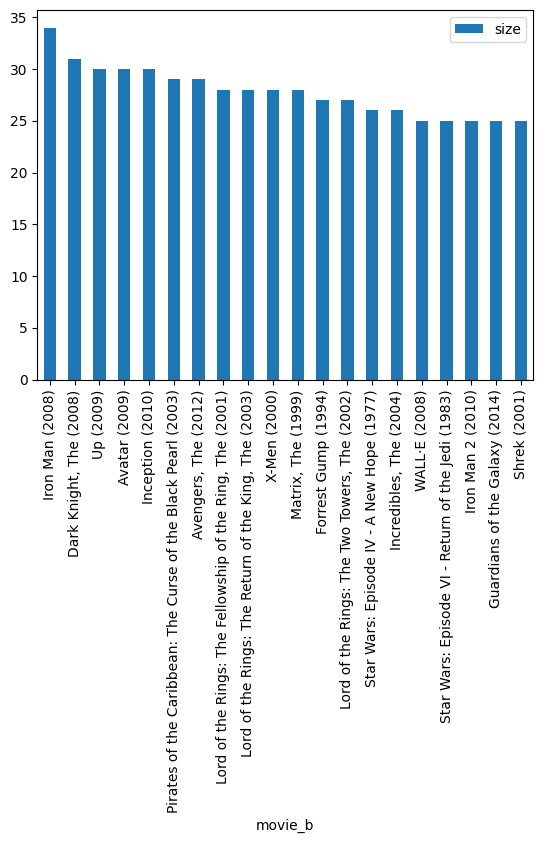

In [23]:
# Extract the movies and their frequencies
thor_df.head(20).plot.bar(x="movie_b")
plt.show()

Creating content-based data

As much as you might want to jump right to finding similar items and making recommendations, you first need to get your data in a usable format. In the next few exercises, you will explore your base data and work through how to format that data to be used for content-based recommendations.

As a reminder, the desired outcome is a row per movie with each column indicating whether a genre applies to the movie. You will be looking at movie_genre_df, which contains these columns:

name - Name of movie
genre_list - Genre that the movie has been labeled as
A movie may have multiple genres, and therefore multiple rows. In this exercise, you will particularly focus on one movie (Toy Story in this case) to be able to clearly see what is happening with the data.

In [24]:
movies_df = pd.read_csv('movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [25]:
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [26]:
movie_genre_df = movies_df.explode('genres')
movie_genre_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [27]:
# Select only the rows with values in the name column equal to Toy Story
toy_story_genres = movie_genre_df[movie_genre_df['title'] == 'Toy Story (1995)']
toy_story_genres


,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [56]:
# Create cross-tabulated DataFrame from name and genre_list columns
movie_cross_table = pd.crosstab(movie_genre_df['title'], movie_genre_df['genres'])
movie_cross_table


genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
'71 (2014),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
xXx (2002),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
xXx: State of the Union (2005),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
# Select only the rows with Toy Story as the index
toy_story_genres_ct = movie_cross_table[movie_cross_table.index == 'Toy Story (1995)']
toy_story_genres_ct

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
np.sum(toy_story_genres_ct, axis = 1)

title
Toy Story (1995)    5
dtype: int64

In [59]:
yogi_genres_ct = movie_cross_table[movie_cross_table.index.str.contains('Yogi')]
yogi_genres_ct

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Yogi Bear (2010),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
np.sum(yogi_genres_ct, axis = 1)

title
Yogi Bear (2010)    2
dtype: int64

In [61]:
# identify common genres

common = 0
for i in range(movie_cross_table.shape[1]):
    if yogi_genres_ct.iloc[0][i] == 1 and toy_story_genres_ct.iloc[0][i] == 1:
        common += 1
common

C:\Users\Alienware\AppData\Local\Temp\ipykernel_22244\1513310054.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if yogi_genres_ct.iloc[0][i] == 1 and toy_story_genres_ct.iloc[0][i] == 1:


2